In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
# %matplotlib inline
plt.style.use('fivethirtyeight')

# Overarching question: What impact do refs have on NBA game outcomes? #

Does the ref and team have an impact on the outcome of the game?
Are there certain teams that refs have an impact on more than others?
Are there any teams hugely positively/negatively affected by the refs?

By Priyam Mohanty, Alexander Lam, and Jay Aindow

# Data Cleaning #

First, we read the data using the 'read_csv' function from pandas.

In [2]:
box_scores = pd.read_csv('Basketball-BoxScores.csv')
team_box_scores = pd.read_csv('Basketball-TeamBoxScores.csv')

Then, for each dataset, we combine official names into one column, make wins 1 and losses 0, add a year column, and make sure there are no null values.

In [3]:
# Process box_scores
box_scores['off'] = box_scores['offFNm'] + ' ' + box_scores['offLNm']
box_scores = box_scores.drop(["offLNm", "offFNm"], axis=1)
box_scores['teamRslt'] = (box_scores['teamRslt'] == "Win").astype(int)
box_scores['opptRslt'] = (box_scores['opptRslt'] == "Win").astype(int)
box_scores['year'] = pd.to_datetime(box_scores['gmDate']).dt.year
assert box_scores.isnull().sum().sum() == 0 # Assert that there are no null values
box_scores

,gmDate,gmTime,seasTyp,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,teamMin,teamDayOff,...,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace,off,year
0,2012-10-30,19:00,Regular,WAS,East,Southeast,Away,0,240,0,...,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409,Tony Brothers,2012
1,2012-10-30,19:00,Regular,WAS,East,Southeast,Away,0,240,0,...,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409,Michael Smith,2012
2,2012-10-30,19:00,Regular,WAS,East,Southeast,Away,0,240,0,...,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409,Haywoode Workman,2012
3,2012-10-30,19:00,Regular,CLE,East,Central,Home,1,240,0,...,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409,Tony Brothers,2012
4,2012-10-30,19:00,Regular,CLE,East,Central,Home,1,240,0,...,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409,Michael Smith,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44279,2018-04-11,10:30,Regular,HOU,West,Southwest,Away,0,241,1,...,90.2307,14.1326,0.4471,18.0624,2.0000,54.5455,91.9864,91.6047,J.T. Orr,2018
44280,2018-04-11,10:30,Regular,HOU,West,Southwest,Away,0,241,1,...,90.2307,14.1326,0.4471,18.0624,2.0000,54.5455,91.9864,91.6047,Scott Foster,2018
44281,2018-04-11,10:30,Regular,SAC,West,Pacific,Home,1,240,2,...,104.3633,-14.1326,0.3523,9.7969,0.7857,14.2857,91.9864,91.9864,Josh Tiven,2018
44282,2018-04-11,10:30,Regular,SAC,West,Pacific,Home,1,240,2,...,104.3633,-14.1326,0.3523,9.7969,0.7857,14.2857,91.9864,91.9864,J.T. Orr,2018


In [4]:
# Process team_box_scores
team_box_scores['off1'] = team_box_scores['offFNm1'] + ' ' + team_box_scores['offLNm1']
team_box_scores['off2'] = team_box_scores['offFNm2'] + ' ' + team_box_scores['offLNm2']
team_box_scores['off3'] = team_box_scores['offFNm3'] + ' ' + team_box_scores['offLNm3']
team_box_scores = team_box_scores.drop(["offFNm1", "offFNm2", "offFNm3", "offLNm1", "offLNm2", "offLNm3"], axis=1)
team_box_scores['teamRslt'] = (team_box_scores['teamRslt'] == "Win").astype(int)
team_box_scores['opptRslt'] = (team_box_scores['opptRslt'] == "Win").astype(int)
team_box_scores['year'] = pd.to_datetime(team_box_scores['gmDate']).dt.year
team_box_scores = team_box_scores.dropna()
assert team_box_scores.isnull().sum().sum() == 0 # Assert that there are no null values
team_box_scores

,gmDate,gmTime,seasTyp,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,teamMin,teamDayOff,...,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace,off1,off2,off3,year
0,2012-10-30,19:00,Regular,WAS,East,Southeast,Away,0,240,0,...,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409,Tony Brothers,Michael Smith,Haywoode Workman,2012
1,2012-10-30,19:00,Regular,CLE,East,Central,Home,1,240,0,...,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409,Tony Brothers,Michael Smith,Haywoode Workman,2012
2,2012-10-30,20:00,Regular,BOS,East,Atlantic,Away,0,240,0,...,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832,Monty McCutchen,Sean Wright,Kane Fitzgerald,2012
3,2012-10-30,20:00,Regular,MIA,East,Southeast,Home,1,240,0,...,0.4643,18.8501,1.5000,25.0000,94.9832,94.9832,Monty McCutchen,Sean Wright,Kane Fitzgerald,2012
4,2012-10-30,22:30,Regular,DAL,West,Southwest,Away,1,240,0,...,0.5000,18.6567,1.7143,42.8571,91.5790,91.5790,Scott Foster,Gary Zielinski,Eric Dalen,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14753,2018-04-11,10:30,Regular,LAC,West,Pacific,Home,0,240,2,...,0.4421,18.2428,1.4706,47.0588,101.7513,101.7513,Ron Garretson,Rodney Mott,Derek Richardson,2018
14754,2018-04-11,10:30,Regular,UTA,West,Northwest,Away,0,241,1,...,0.4457,15.1951,1.9000,90.0000,97.6761,97.2708,Kevin Cutler,Bill Kennedy,Eric Lewis,2018
14755,2018-04-11,10:30,Regular,POR,West,Northwest,Home,1,240,2,...,0.3667,13.5788,1.2000,33.3333,97.6761,97.6761,Kevin Cutler,Bill Kennedy,Eric Lewis,2018
14756,2018-04-11,10:30,Regular,HOU,West,Southwest,Away,0,241,1,...,0.4471,18.0624,2.0000,54.5455,91.9864,91.6047,Josh Tiven,J.T. Orr,Scott Foster,2018


Now, we want to compile a table of the win rate each team has under each ref. The resulting table can be used for comparing win rates across teams and refs, along with comparing win rates to average win rates.

In [5]:
# We want to see if certain refs show differences in the number of wins/losses of a team. 

box_scores['off'].unique()
ref_team_win_rate = pd.DataFrame(0, columns=box_scores['teamAbbr'].unique(), index=box_scores['off'].unique())

for ref in ref_team_win_rate.index:
    for team in ref_team_win_rate.columns:
        total_games = len(box_scores[(box_scores['teamAbbr'] == team) & (box_scores['off'] == ref)])
        if total_games > 0:
            ref_team_win_rate.loc[ref, team] = sum(box_scores[(box_scores['teamAbbr'] == team) & (box_scores['off'] == ref)]['teamRslt']) / total_games

In [6]:
ref_team_win_rate

,WAS,CLE,BOS,MIA,DAL,LAL,DEN,PHI,IND,TOR,...,LAC,POR,OKC,ORL,CHA,MIL,ATL,NY,MIN,BKN
Tony Brothers,0.560000,0.521739,0.555556,0.600000,0.612903,0.285714,0.608696,0.366667,0.515152,0.620690,...,0.578947,0.535714,0.818182,0.190476,0.550000,0.473684,0.607143,0.222222,0.423077,0.347826
Michael Smith,0.360000,0.555556,0.500000,0.703704,0.384615,0.521739,0.285714,0.280000,0.384615,0.677419,...,0.615385,0.700000,0.772727,0.392857,0.419355,0.423077,0.424242,0.583333,0.370370,0.571429
Haywoode Workman,0.653846,0.421053,0.450000,0.576923,0.320000,0.380952,0.578947,0.272727,0.461538,0.388889,...,0.842105,0.560000,0.619048,0.307692,0.400000,0.571429,0.500000,0.409091,0.409091,0.375000
Monty McCutchen,0.500000,0.464286,0.583333,0.680000,0.500000,0.428571,0.480000,0.263158,0.608696,0.578947,...,0.538462,0.529412,0.592593,0.421053,0.450000,0.357143,0.600000,0.480000,0.428571,0.263158
Sean Wright,0.400000,0.640000,0.296296,0.576923,0.518519,0.333333,0.481481,0.269231,0.250000,0.555556,...,0.666667,0.523810,0.551724,0.520000,0.333333,0.451613,0.461538,0.400000,0.375000,0.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jonathan Sterling,1.000000,1.000000,0.000000,0.000000,0.333333,1.000000,0.750000,0.500000,0.800000,0.000000,...,0.500000,1.000000,0.666667,0.166667,0.000000,0.666667,0.000000,0.500000,0.800000,0.000000
Ray Acosta,1.000000,1.000000,0.500000,0.250000,0.000000,0.500000,0.666667,1.000000,1.000000,0.333333,...,1.000000,0.000000,0.500000,0.000000,0.500000,0.666667,0.000000,0.500000,0.000000,0.800000
Brandon Adair,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
Randy Richardson,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


We create the train and test sets now too, for later use. The train set consists of years 2012-2016, and the test set contains years 2017-2018. We also want to one-hot encoude the names of officials, teams, and opponent teams becuase they are categorical variables. This way, we can pass them in as features to classifiers like the Logistic Regression Classifier or Decision Tree Classifier.

In [7]:
train = box_scores[box_scores['year'] < 2017]
test = box_scores[box_scores['year'] >= 2017]
train_with_dummies= pd.get_dummies(train,columns=["off", 'teamAbbr', 'opptAbbr'],drop_first=False)
test_with_dummies = pd.get_dummies(test,columns=["off", 'teamAbbr', 'opptAbbr'],drop_first=False)

# Data Visualizations #

First, taking a look at the data, we see that there are many refs that haven't reffed for many teams. For example, Randy Richardson has reffed less than 10 games in his entire time in the NBA. For this reason, we want to see which refs are long-standing over the years and have a solid sample size.

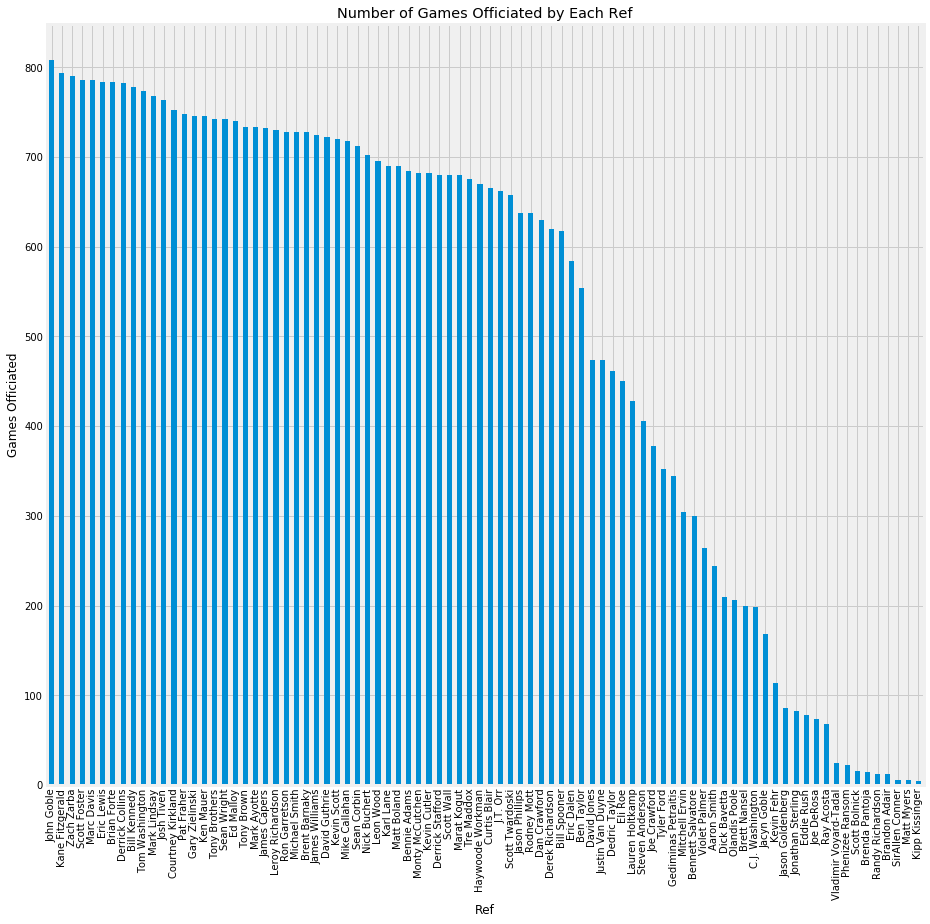

In [8]:
plt.figure(figsize=(14, 14))
box_scores['off'].value_counts().plot(kind="bar")
plt.xlabel("Ref")
plt.ylabel("Games Officiated")
plt.title("Number of Games Officiated by Each Ref");

We want to remove the bottom 25% of refs so as to make sure the data does not contain outliers. Refs who have reffed less games have a much smaller sample size, which could lead to skewed, inaccurate results. When testing visualizations, data was skewed towards the small sample size refs. So they will be removed.

In [9]:
print(box_scores['off'].value_counts().quantile([0, .25, .50, .75]))
# Cut refs who have officiated less than 273 games.
ref_games = box_scores.groupby('off').filter(lambda x : len(x)>=273)
final_refs = ref_games['off'].unique()
ref_team_win_rate = ref_team_win_rate.reset_index()
ref_team_win_rate = ref_team_win_rate[ref_team_win_rate['index'].isin(final_refs)]
ref_team_win_rate.set_index("index", inplace=True)
ref_team_win_rate

0.00      4.0
0.25    273.0
0.50    668.0
0.75    731.5
Name: off, dtype: float64


,WAS,CLE,BOS,MIA,DAL,LAL,DEN,PHI,IND,TOR,...,LAC,POR,OKC,ORL,CHA,MIL,ATL,NY,MIN,BKN
index,,,,,,,,,,,,,,,,,,,,,
Tony Brothers,0.560000,0.521739,0.555556,0.600000,0.612903,0.285714,0.608696,0.366667,0.515152,0.620690,...,0.578947,0.535714,0.818182,0.190476,0.550000,0.473684,0.607143,0.222222,0.423077,0.347826
Michael Smith,0.360000,0.555556,0.500000,0.703704,0.384615,0.521739,0.285714,0.280000,0.384615,0.677419,...,0.615385,0.700000,0.772727,0.392857,0.419355,0.423077,0.424242,0.583333,0.370370,0.571429
Haywoode Workman,0.653846,0.421053,0.450000,0.576923,0.320000,0.380952,0.578947,0.272727,0.461538,0.388889,...,0.842105,0.560000,0.619048,0.307692,0.400000,0.571429,0.500000,0.409091,0.409091,0.375000
Monty McCutchen,0.500000,0.464286,0.583333,0.680000,0.500000,0.428571,0.480000,0.263158,0.608696,0.578947,...,0.538462,0.529412,0.592593,0.421053,0.450000,0.357143,0.600000,0.480000,0.428571,0.263158
Sean Wright,0.400000,0.640000,0.296296,0.576923,0.518519,0.333333,0.481481,0.269231,0.250000,0.555556,...,0.666667,0.523810,0.551724,0.520000,0.333333,0.451613,0.461538,0.400000,0.375000,0.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dedric Taylor,0.526316,0.500000,0.538462,0.650000,0.538462,0.437500,0.312500,0.421053,0.545455,0.714286,...,0.642857,0.466667,0.400000,0.416667,0.384615,0.357143,0.571429,0.238095,0.285714,0.285714
Justin Van Duyne,0.647059,0.500000,0.466667,0.666667,0.500000,0.071429,0.500000,0.375000,0.533333,0.600000,...,0.666667,0.733333,0.437500,0.400000,0.529412,0.470588,0.466667,0.307692,0.562500,0.444444
Mitchell Ervin,0.583333,0.571429,0.538462,0.700000,0.375000,0.333333,0.625000,0.285714,0.545455,0.416667,...,0.555556,0.666667,0.625000,0.700000,0.416667,0.600000,0.600000,0.400000,0.400000,0.214286


It looks like a majority of the refs have reffed 100+ games, though there are some refs that reffed much less than that. Now, we want to see which refs seem to have the largest "win rates" for a certain team and large "lose rates" for certain teams. For these to matter, we need to do this in comparison to the team's average win rates.

In [10]:
win_rates = {}
for team in ref_team_win_rate.columns:
    total_games = len(box_scores[(box_scores['teamAbbr'] == team)])
    win_rates[team] = sum(box_scores[(box_scores['teamAbbr'] == team)]['teamRslt']) / total_games
win_rates

{'WAS': 0.5121951219512195,
 'CLE': 0.5443466486120515,
 'BOS': 0.5329260013577732,
 'MIA': 0.5897088693297224,
 'DAL': 0.4861205145565335,
 'LAL': 0.34732566012186866,
 'DEN': 0.4918809201623816,
 'PHI': 0.32723577235772355,
 'IND': 0.5661914460285132,
 'TOR': 0.6036585365853658,
 'HOU': 0.6429539295392954,
 'DET': 0.4271186440677966,
 'SAC': 0.3597560975609756,
 'CHI': 0.5145565335138795,
 'SA': 0.7113821138211383,
 'NO': 0.44308943089430897,
 'UTA': 0.4983073798239675,
 'GS': 0.7378048780487805,
 'PHO': 0.36585365853658536,
 'MEM': 0.5447154471544715,
 'LAC': 0.6402439024390244,
 'POR': 0.5531482735274205,
 'OKC': 0.6382113821138211,
 'ORL': 0.31910569105691056,
 'CHA': 0.4406779661016949,
 'MIL': 0.43263371699390657,
 'ATL': 0.5223577235772358,
 'NY': 0.4065040650406504,
 'MIN': 0.39377537212449254,
 'BKN': 0.4065040650406504}

We will subtract the average win rate of a team from the team win rate under each ref to get the difference in average fouls per ref compared to the average. This is done using the team's average win rate and the ref's average win rate for the team.

In [11]:
ref_team_win_rate_compared = ref_team_win_rate
for team in ref_team_win_rate:
    if win_rates[team] != 0:
        ref_team_win_rate_compared[team] = ref_team_win_rate_compared[team] - win_rates[team]
    else:
        ref_team_win_rate_compared[team] = 0
ref_team_win_rate_compared

,WAS,CLE,BOS,MIA,DAL,LAL,DEN,PHI,IND,TOR,...,LAC,POR,OKC,ORL,CHA,MIL,ATL,NY,MIN,BKN
index,,,,,,,,,,,,,,,,,,,,,
Tony Brothers,0.047805,-0.022608,0.022630,0.010291,0.126783,-0.061611,0.116815,0.039431,-0.051040,0.017031,...,-0.061297,-0.017434,0.179970,-0.128630,0.109322,0.041050,0.084785,-0.184282,0.029302,-0.058678
Michael Smith,-0.152195,0.011209,-0.032926,0.113995,-0.101505,0.174413,-0.206167,-0.047236,-0.181576,0.073761,...,-0.024859,0.146852,0.134516,0.073751,-0.021323,-0.009557,-0.098115,0.176829,-0.023405,0.164925
Haywoode Workman,0.141651,-0.123294,-0.082926,-0.012786,-0.166121,0.033627,0.087066,-0.054508,-0.104653,-0.214770,...,0.201861,0.006852,-0.019164,-0.011413,-0.040678,0.138795,-0.022358,0.002587,0.015316,-0.031504
Monty McCutchen,-0.012195,-0.080061,0.050407,0.090291,0.013879,0.081246,-0.011881,-0.064078,0.042504,-0.024711,...,-0.101782,-0.023737,-0.045619,0.101947,0.009322,-0.075491,0.077642,0.073496,0.034796,-0.143346
Sean Wright,-0.112195,0.095653,-0.236630,-0.012786,0.032398,-0.013992,-0.010399,-0.058005,-0.316191,-0.048103,...,0.026423,-0.029339,-0.086487,0.200894,-0.107345,0.018979,-0.060819,-0.006504,-0.018775,0.131957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dedric Taylor,0.014121,-0.044347,0.005536,0.060291,0.052341,0.090174,-0.179381,0.093817,-0.020737,0.110627,...,0.002613,-0.086482,-0.238211,0.097561,-0.056063,-0.075491,0.049071,-0.168409,-0.108061,-0.120790
Justin Van Duyne,0.134864,-0.044347,-0.066259,0.076958,0.013879,-0.275897,0.008119,0.047764,-0.032858,-0.003659,...,0.026423,0.180185,-0.200711,0.080894,0.088734,0.037955,-0.055691,-0.098812,0.168725,0.037940
Mitchell Ervin,0.071138,0.027082,0.005536,0.110291,-0.111121,-0.013992,0.133119,-0.041521,-0.020737,-0.186992,...,-0.084688,0.113518,-0.013211,0.380894,-0.024011,0.167366,0.077642,-0.006504,0.006225,-0.192218


Now, let's see the overall differences graphed out.

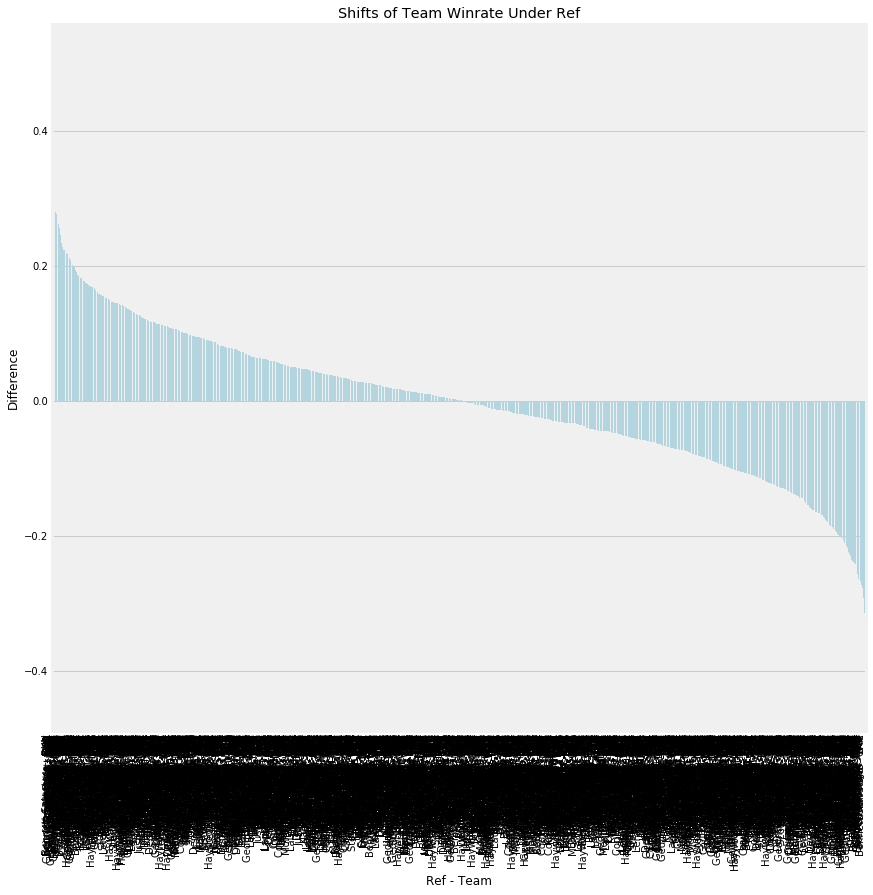

In [12]:
N = 1920 # The total number of ref-team combinations
a = np.array(ref_team_win_rate_compared)
idx = np.argsort(a.ravel())[-N:][::-1] #single slicing: `[:N-2:-1]`
topN_val = a.ravel()[idx]
row_col = np.c_[np.unravel_index(idx, a.shape)]
ref_teams = []
diffs = []
for i in row_col:
    ref_teams.append(ref_team_win_rate_compared.index[i[0]] + " - " + ref_team_win_rate_compared.columns[i[1]])
    diffs.append(ref_team_win_rate_compared.iloc[i[0], i[1]])
barChartData = pd.DataFrame(0, columns=["Ref - Team", "Difference"], index=np.arange(N))
barChartData["Ref - Team"] = ref_teams
barChartData["Difference"] = diffs
barChartData
plt.figure(figsize=(13,13))
plt.title("Shifts of Team Winrate Under Ref")
positive = sns.barplot(x="Ref - Team", y="Difference", data=barChartData, color="lightblue")
positive.set_xticklabels(positive.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

Which teams have the biggest positive shift during a ref's time?

[Text(0, 0, 'Bennett Salvatore - BKN'),
 Text(0, 0, 'Bennett Salvatore - PHO'),
 Text(0, 0, 'Gediminas Petraitis - CHA'),
 Text(0, 0, 'Mitchell Ervin - ORL'),
 Text(0, 0, 'David Jones - CLE'),
 Text(0, 0, 'Rodney Mott - NY'),
 Text(0, 0, 'Steven Anderson - POR'),
 Text(0, 0, 'Eli Roe - BKN'),
 Text(0, 0, 'Tyler Ford - HOU'),
 Text(0, 0, 'Eric Dalen - DEN'),
 Text(0, 0, 'Joe Crawford - DEN'),
 Text(0, 0, 'Gediminas Petraitis - HOU'),
 Text(0, 0, 'Eric Dalen - PHO'),
 Text(0, 0, 'Steven Anderson - CHA'),
 Text(0, 0, 'Gediminas Petraitis - GS'),
 Text(0, 0, 'Mitchell Ervin - GS'),
 Text(0, 0, 'Eli Roe - BOS'),
 Text(0, 0, 'Derek Richardson - CLE'),
 Text(0, 0, 'Gediminas Petraitis - CLE'),
 Text(0, 0, 'Joe Crawford - POR'),
 Text(0, 0, 'Monty McCutchen - CHI'),
 Text(0, 0, 'Pat Fraher - BOS'),
 Text(0, 0, 'Bennett Salvatore - MEM'),
 Text(0, 0, 'Bennett Salvatore - MIA'),
 Text(0, 0, 'Karl Lane - MEM')]

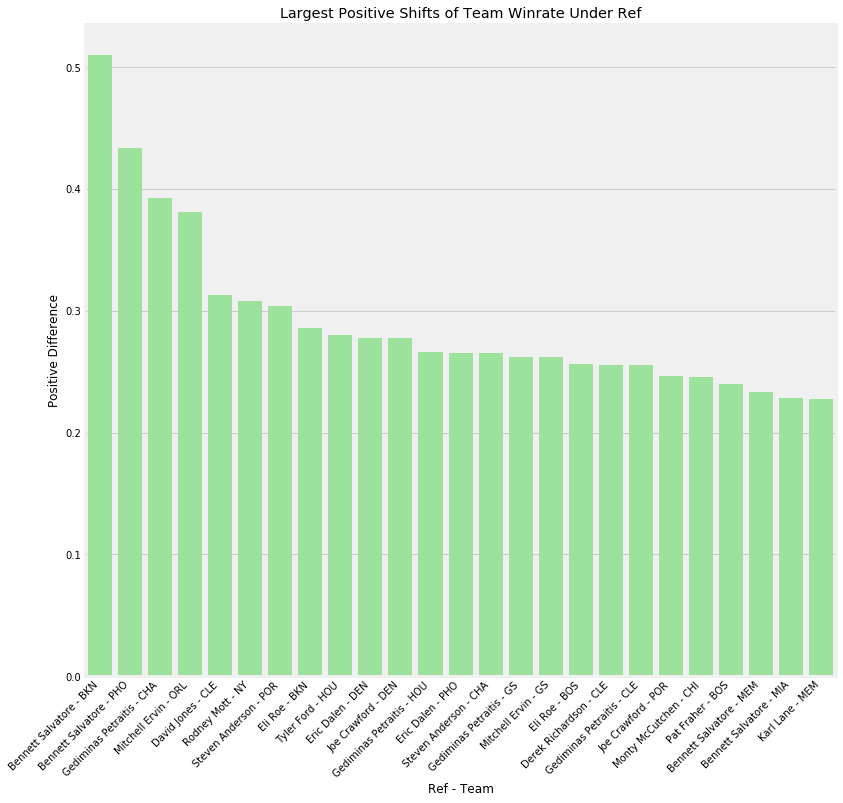

In [13]:
N = 25
a = np.array(ref_team_win_rate_compared)
idx = np.argsort(a.ravel())[-N:][::-1] 
topN_val = a.ravel()[idx]
row_col = np.c_[np.unravel_index(idx, a.shape)]
ref_teams = []
diffs = []
for i in row_col:
    ref_teams.append(ref_team_win_rate_compared.index[i[0]] + " - " + ref_team_win_rate_compared.columns[i[1]])
    diffs.append(ref_team_win_rate_compared.iloc[i[0], i[1]])
barChartData = pd.DataFrame(0, columns=["Ref - Team", "Positive Difference"], index=np.arange(N))
barChartData["Ref - Team"] = ref_teams
barChartData["Positive Difference"] = diffs
barChartData
plt.figure(figsize=(12,12))
plt.title("Largest Positive Shifts of Team Winrate Under Ref")
positive = sns.barplot(x="Ref - Team", y="Positive Difference", data=barChartData, color="lightgreen")
positive.set_xticklabels(positive.get_xticklabels(), rotation=45, horizontalalignment='right')

Which teams have the biggest negative shift during a ref's time?

[Text(0, 0, 'Bennett Salvatore - CHA'),
 Text(0, 0, 'Brian Forte - LAC'),
 Text(0, 0, 'Steven Anderson - IND'),
 Text(0, 0, 'Sean Wright - IND'),
 Text(0, 0, 'Bennett Salvatore - CHI'),
 Text(0, 0, 'Joe Crawford - WAS'),
 Text(0, 0, 'Justin Van Duyne - CHI'),
 Text(0, 0, 'Tyler Ford - BKN'),
 Text(0, 0, 'Scott Twardoski - ORL'),
 Text(0, 0, 'Justin Van Duyne - LAL'),
 Text(0, 0, 'Bennie Adams - HOU'),
 Text(0, 0, 'Tyler Ford - MEM'),
 Text(0, 0, 'Karl Lane - SAC'),
 Text(0, 0, 'Bill Spooner - MEM'),
 Text(0, 0, 'Ron Garretson - BOS'),
 Text(0, 0, 'Bennett Salvatore - MIL'),
 Text(0, 0, 'David Guthrie - CHI'),
 Text(0, 0, 'Josh Tiven - GS'),
 Text(0, 0, 'Tre Maddox - NY'),
 Text(0, 0, 'Kevin Cutler - OKC'),
 Text(0, 0, 'Steven Anderson - LAL'),
 Text(0, 0, 'John Goble - TOR'),
 Text(0, 0, 'Eric Dalen - SA'),
 Text(0, 0, 'Joe Crawford - UTA'),
 Text(0, 0, 'Steven Anderson - DEN')]

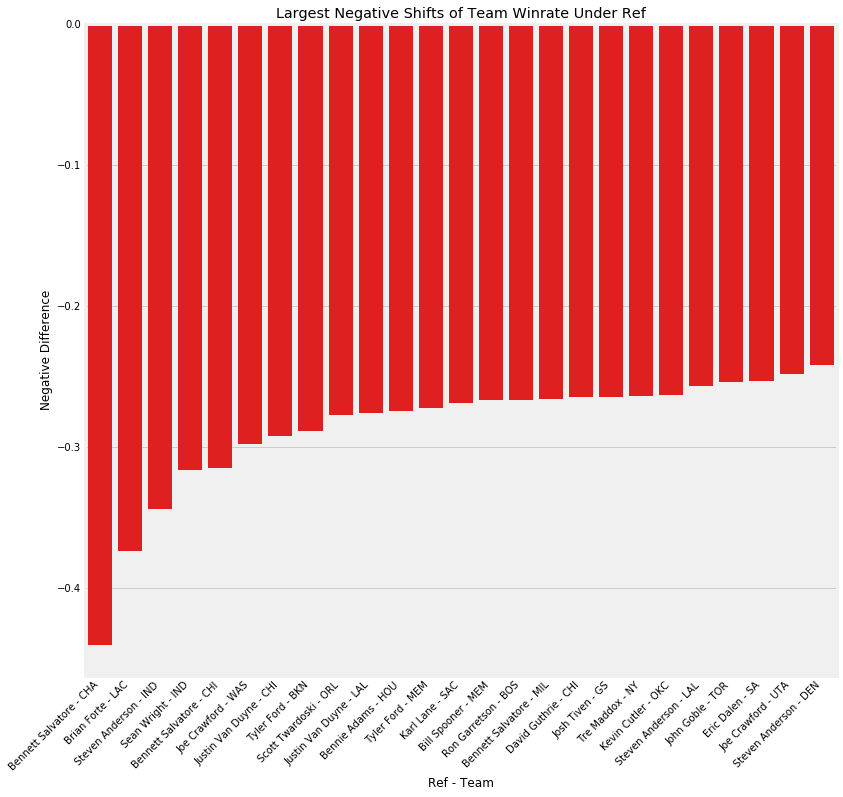

In [14]:
N = 25
a = np.array(ref_team_win_rate_compared) * -1
idx = np.argsort(a.ravel())[-N:][::-1] 
topN_val = a.ravel()[idx]
row_col = np.c_[np.unravel_index(idx, a.shape)]
ref_teams = []
diffs = []
for i in row_col:
    ref_teams.append(ref_team_win_rate_compared.index[i[0]] + " - " + ref_team_win_rate_compared.columns[i[1]])
    diffs.append(ref_team_win_rate_compared.iloc[i[0], i[1]])
barChartData = pd.DataFrame(0, columns=["Ref - Team", "Negative Difference"], index=np.arange(N))
barChartData["Ref - Team"] = ref_teams
barChartData["Negative Difference"] = diffs
barChartData
plt.figure(figsize=(12,12))
plt.title("Largest Negative Shifts of Team Winrate Under Ref")
positive = sns.barplot(x="Ref - Team", y="Negative Difference", data=barChartData, color = "red")
positive.set_xticklabels(positive.get_xticklabels(), rotation=45, horizontalalignment='right')

From these visualizations, it seems like Bennett Salvatore tops the list. However, these visualizations are not perfect.
There are many confounding factors when taking into account data like this. 
For example, team performance is volatile from year to year. When we visualize something like this on a "macro"
level, we essentially normalize the team performance over a span of years.
Furthermore, the data doesn't tell the full story. For example, Salvatore reffed for 33 years and retired in 2015.
This means we are missing a lot of his data and also are incorporating a win rate of the team in years outside
of which Salvatore reffed. Overall, however, it seems that most differences are small.

Do certain refs cause more personal fouls to be called than the average number of fouls per team?
We want to get the average number of fouls called per team first.

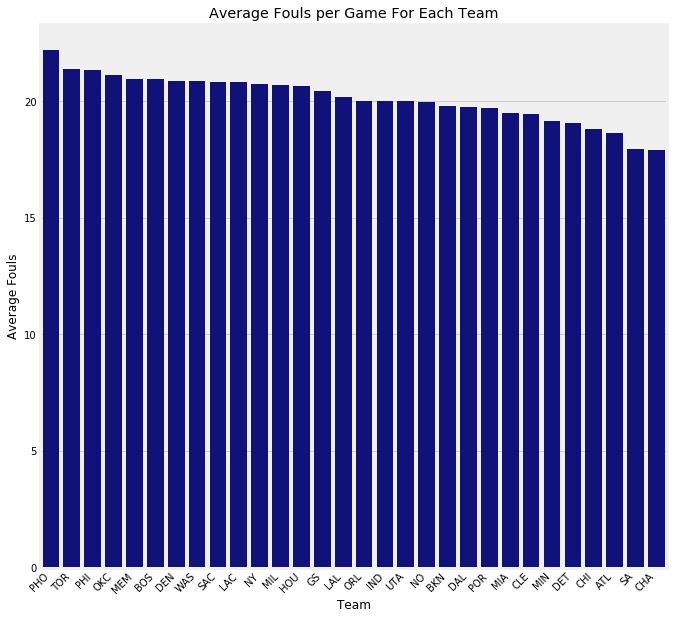

In [15]:
fouls_per_team = {}
games_per_team = {}
PF_per_game = {}
for team in box_scores['teamAbbr'].unique():
    fouls = sum(team_box_scores[team_box_scores['teamAbbr'] == team]['teamPF'])
    games = len(team_box_scores[team_box_scores['teamAbbr'] == team])
    games_per_team[team] = games
    fouls_per_team[team] = fouls
for team in box_scores['teamAbbr'].unique():
    PF_per_game[team] = fouls_per_team[team]/games_per_team[team]

PF_pergame_df = pd.Series(PF_per_game).sort_values(ascending=False)
PF_pergame_df = pd.DataFrame(PF_pergame_df).reset_index().rename({0: "Average Fouls", "index": "Team"}, axis=1)

plt.figure(figsize=(10,10))
plt.title("Average Fouls per Game For Each Team")
positive = sns.barplot(x="Team", y="Average Fouls", data=PF_pergame_df, color="darkblue")
positive.set_xticklabels(positive.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()
# Average seems to be around 20 fouls per team. Every team is pretty close to this number.

Let's see what the distribution looks like.

Average Fouls/Game Per Team: 20.129170591356765
Standard Deviation: 1.0211089360644063


Text(0.5, 1.0, 'Average Fouls Per Game Distribution')

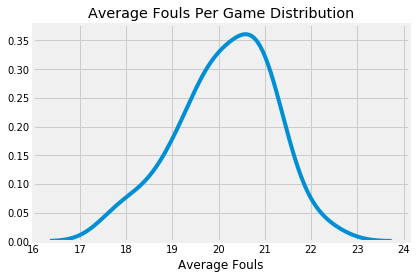

In [16]:
fouls_mean = PF_pergame_df['Average Fouls'].mean()
fouls_std = PF_pergame_df['Average Fouls'].std()
print("Average Fouls/Game Per Team:", fouls_mean)
print("Standard Deviation:", fouls_std)
sns.distplot(PF_pergame_df['Average Fouls'], hist=False)
plt.title("Average Fouls Per Game Distribution")

Text(0.5, 1.0, 'Average Fouls Per Game Distribution (Normalized)')

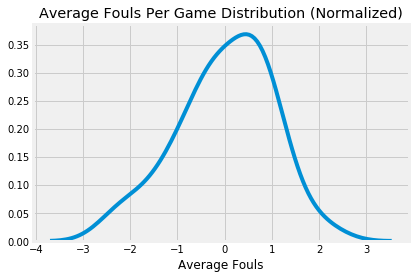

In [17]:
normalized_fouls = (PF_pergame_df['Average Fouls'] - fouls_mean)/fouls_std
sns.distplot(normalized_fouls, hist=False)
plt.title("Average Fouls Per Game Distribution (Normalized)")

The distribution seems somewhat skewed left. This means that the mean is less than the median, and that there are an unusual amount of ref-team combinations that receive less fouls than the average.

In [18]:
# We are finding the average number of fouls for each team-ref combination.
for ref in final_refs:
    PF_pergame_df[ref] = ''
PF_pergame_df = PF_pergame_df.set_index("Team")
for ref in final_refs:
    for team in PF_pergame_df.index:
        total_fouls = sum(box_scores[(box_scores['teamAbbr'] == team) & (box_scores['off'] == ref)]['teamPF'])
        total_games = len(box_scores[(box_scores['teamAbbr'] == team) & (box_scores['off'] == ref)])
        PF_pergame_df.loc[team, ref] = total_fouls/total_games
PF_pergame_df

,Average Fouls,Tony Brothers,Michael Smith,Haywoode Workman,Monty McCutchen,Sean Wright,Kane Fitzgerald,Scott Foster,Gary Zielinski,Eric Dalen,...,Marat Kogut,Scott Twardoski,Josh Tiven,Steven Anderson,Ben Taylor,Dedric Taylor,Justin Van Duyne,Mitchell Ervin,Tyler Ford,Gediminas Petraitis
Team,,,,,,,,,,,,,,,,,,,,,
PHO,22.205285,21.24,22.45,20.4286,22.4138,23.7692,21.96,22.4643,21.4483,21.0526,...,21.9474,22.2,21.7895,25.8889,23.6667,23,26,23.4444,24.625,23.5556
TOR,21.404472,20.7931,22.6452,23.3889,21.7368,21.3704,20.28,22.4286,21.1905,21.1053,...,22.1667,20.7391,22.5333,22.1538,23.0556,20.9524,19.1,23.3333,21.5,21.4167
PHI,21.361789,21.0333,21.92,21.6818,22.3158,21.9615,24.2174,21.8462,21.4348,20.8667,...,22.04,20.0476,22.6875,22.8,23.3158,21.6316,22,22.2857,21.8667,20
OKC,21.136179,19.7727,22.3636,22.5714,23.1111,21.5862,21.5556,22.8333,21.2692,20.6957,...,21.6667,20.9412,22.0769,19.5556,21.9375,21.1333,24.4375,23,21,21.7
MEM,20.973577,20.6923,21.1562,21.28,19.4706,22.8621,21.1,20.4118,21,21.3333,...,19.5,21.4286,20.5217,21.4615,22.375,22.4375,22.8667,22.1429,23.3636,21.5556
BOS,20.971429,20.963,20.4375,20.2,21.7917,21.6667,21.6364,21.35,21.8333,21.32,...,20.871,21.3,21.0833,21.6364,21.8696,19.8462,20,19.7692,20,20.9091
DEN,20.888211,20.5652,21,19.9474,20.56,21.1481,21.3077,22.9259,21.8667,18.7692,...,19.6667,21.04,21.04,22.5,21.75,19.875,23.3125,20.75,17.6,20
WAS,20.857724,20.88,21.92,21,20.7692,21.85,21.4483,21.5385,23.2273,20.9048,...,21.4643,21.125,20.625,20,21.5333,18.6842,22.8235,25.25,23.25,19.75
SAC,20.821138,21.7619,22.3684,20.6957,21.4,22.4444,21.7143,21.4348,21.2174,19.125,...,21.7917,20.4483,20.5,22.5625,20.1765,17.8667,22.5,20,20.75,20.1


In [19]:
sub_test = PF_pergame_df
for ref in final_refs:
    for team in PF_pergame_df.index:
        sub_test.loc[team, ref] = sub_test.loc[team, ref] - sub_test.loc[team, "Average Fouls"]
sub_test = sub_test.drop("Average Fouls", axis=1)
sub_test

,Tony Brothers,Michael Smith,Haywoode Workman,Monty McCutchen,Sean Wright,Kane Fitzgerald,Scott Foster,Gary Zielinski,Eric Dalen,Bennett Salvatore,...,Marat Kogut,Scott Twardoski,Josh Tiven,Steven Anderson,Ben Taylor,Dedric Taylor,Justin Van Duyne,Mitchell Ervin,Tyler Ford,Gediminas Petraitis
Team,,,,,,,,,,,,,,,,,,,,,
PHO,-0.965285,0.244715,-1.77671,0.208509,1.56395,-0.245285,0.259001,-0.757009,-1.15265,0.194715,...,-0.257916,-0.00528455,-0.415811,3.6836,1.46138,0.794715,3.79472,1.23916,2.41972,1.35027
TOR,-0.611368,1.24069,1.98442,0.332371,-0.0341012,-1.12447,1.0241,-0.213995,-0.299208,3.95916,...,0.762195,-0.665341,1.12886,0.749375,1.65108,-0.452091,-2.30447,1.92886,0.0955285,0.0121951
PHI,-0.328455,0.558211,0.32003,0.954001,0.59975,2.8556,0.484365,0.072994,-0.495122,-0.438712,...,0.678211,-1.31417,1.32571,1.43821,1.954,0.26979,0.638211,0.923926,0.504878,-1.36179
OKC,-1.36345,1.22746,1.43525,1.97493,0.450028,0.419377,1.69715,0.133052,-0.440527,-1.42189,...,0.530488,-0.195002,0.940744,-1.58062,0.801321,-0.00284553,3.30132,1.86382,-0.136179,0.563821
MEM,-0.28127,0.182673,0.306423,-1.50299,1.88849,0.126423,-0.561813,0.0264228,0.359756,-1.08469,...,-1.47358,0.454994,-0.451838,0.487961,1.40142,1.46392,1.89309,1.16928,2.39006,0.581978
BOS,-0.00846561,-0.533929,-0.771429,0.820238,0.695238,0.664935,0.378571,0.861905,0.348571,1.3619,...,-0.100461,0.328571,0.111905,0.664935,0.898137,-1.12527,-0.971429,-1.2022,-0.971429,-0.0623377
DEN,-0.322994,0.111789,-0.940843,-0.328211,0.259937,0.419481,2.03771,0.978455,-2.11898,3.11179,...,-1.22154,0.151789,0.151789,1.61179,0.861789,-1.01321,2.42429,-0.138211,-3.28821,-0.888211
WAS,0.0222764,1.06228,0.142276,-0.0884928,0.992276,0.590552,0.680738,2.36955,0.0470383,1.04228,...,0.606562,0.267276,-0.232724,-0.857724,0.67561,-2.17351,1.96581,4.39228,2.39228,-1.10772
SAC,0.940767,1.54728,-0.125486,0.578862,1.62331,0.893148,0.613644,0.396253,-1.69614,-0.321138,...,0.970528,-0.372862,-0.321138,1.74136,-0.644668,-2.95447,1.67886,-0.821138,-0.0711382,-0.721138


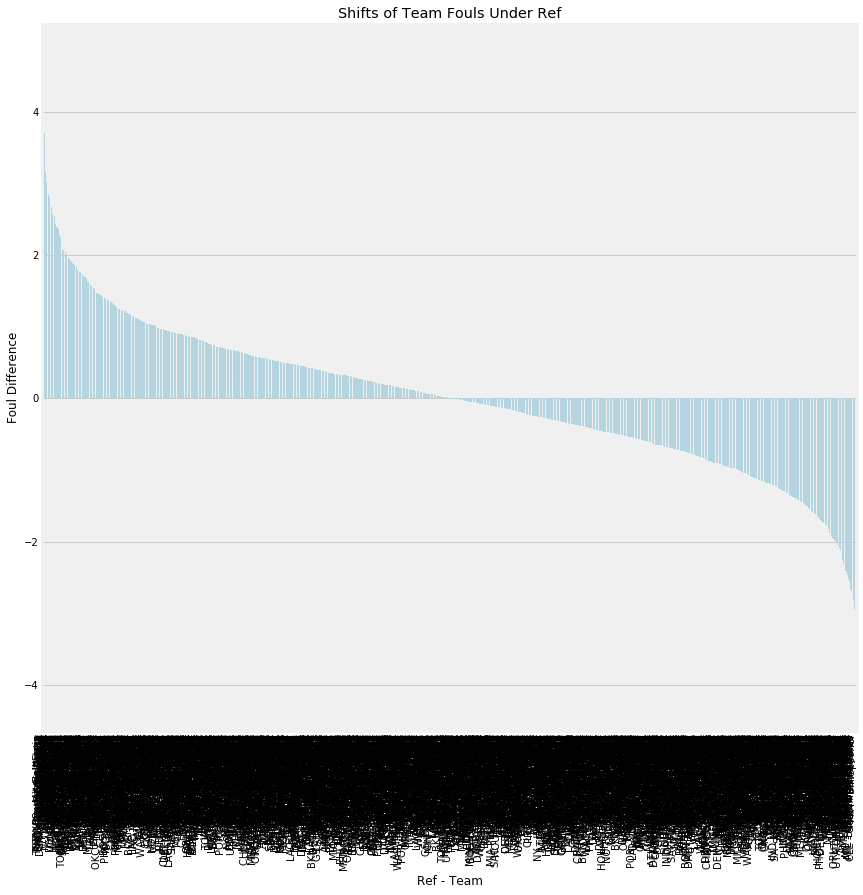

In [20]:
N = 1920
a = np.array(sub_test)
idx = np.argsort(a.ravel())[-N:][::-1] 
topN_val = a.ravel()[idx]
row_col = np.c_[np.unravel_index(idx, a.shape)]
ref_teams = []
diffs = []
for i in row_col:
    ref_teams.append(sub_test.index[i[0]] + " - " + sub_test.columns[i[1]])
    diffs.append(sub_test.iloc[i[0], i[1]])
barChartData = pd.DataFrame(0, columns=["Ref - Team", "Foul Difference"], index=np.arange(N))
barChartData["Ref - Team"] = ref_teams
barChartData["Foul Difference"] = diffs
barChartData
plt.figure(figsize=(13,13))
plt.title("Shifts of Team Fouls Under Ref")
positive = sns.barplot(x="Ref - Team", y="Foul Difference", data=barChartData, color="lightblue")
positive.set_xticklabels(positive.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

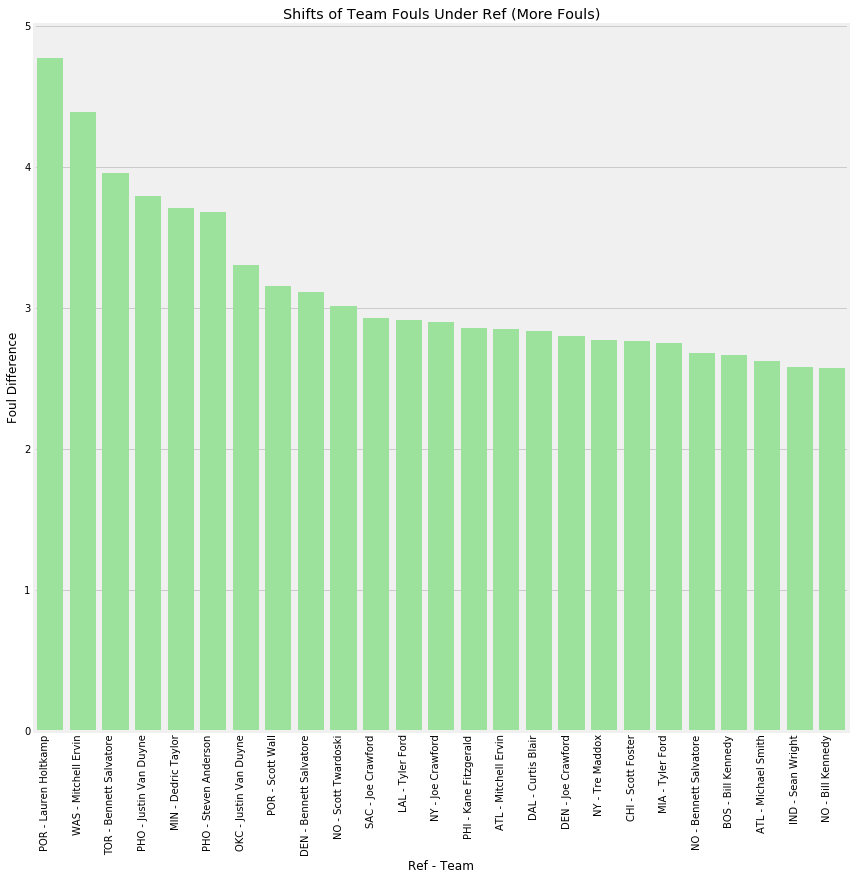

In [21]:
N = 25
a = np.array(sub_test)
idx = np.argsort(a.ravel())[-N:][::-1]
topN_val = a.ravel()[idx]
row_col = np.c_[np.unravel_index(idx, a.shape)]
ref_teams = []
diffs = []
for i in row_col:
    ref_teams.append(sub_test.index[i[0]] + " - " + sub_test.columns[i[1]])
    diffs.append(sub_test.iloc[i[0], i[1]])
barChartData = pd.DataFrame(0, columns=["Ref - Team", "Foul Difference"], index=np.arange(N))
barChartData["Ref - Team"] = ref_teams
barChartData["Foul Difference"] = diffs
barChartData
plt.figure(figsize=(13,13))
plt.title("Shifts of Team Fouls Under Ref (More Fouls)")
positive = sns.barplot(x="Ref - Team", y="Foul Difference", data=barChartData, color="lightgreen")
positive.set_xticklabels(positive.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

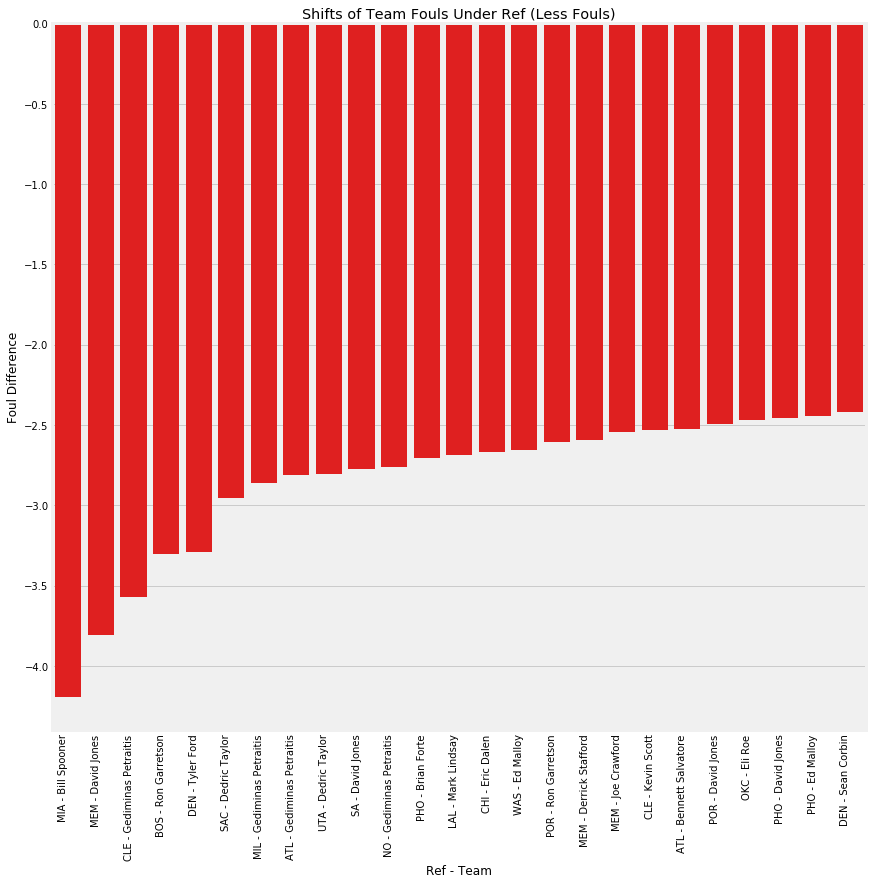

In [22]:
N = 25
a = np.array(sub_test) * -1
idx = np.argsort(a.ravel())[-N:][::-1]
topN_val = a.ravel()[idx]
row_col = np.c_[np.unravel_index(idx, a.shape)]
ref_teams = []
diffs = []
for i in row_col:
    ref_teams.append(sub_test.index[i[0]] + " - " + sub_test.columns[i[1]])
    diffs.append(sub_test.iloc[i[0], i[1]])
barChartData = pd.DataFrame(0, columns=["Ref - Team", "Foul Difference"], index=np.arange(N))
barChartData["Ref - Team"] = ref_teams
barChartData["Foul Difference"] = diffs
barChartData
plt.figure(figsize=(13,13))
plt.title("Shifts of Team Fouls Under Ref (Less Fouls)")
positive = sns.barplot(x="Ref - Team", y="Foul Difference", data=barChartData, color="red")
positive.set_xticklabels(positive.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [23]:
print("Average Fouls/Game Per Team:", fouls_mean)
print("Standard Deviation:", fouls_std)

Average Fouls/Game Per Team: 20.129170591356765
Standard Deviation: 1.0211089360644063


With an standard deviation of 1.02, there are definitely some ref-team combinations that seem to be outliers. However, there are many confouding factors when it comes to the NBA. It could very well have to do with play style, reffing style, how certain games played out, the player-ref relationship, etc.

A fun visualization: Do the average number of foul per game per year in the NBA change?
This can be representative of the playstyle and overall reffing style in the NBA (and possible change over time).

Text(0, 0.5, 'Year')

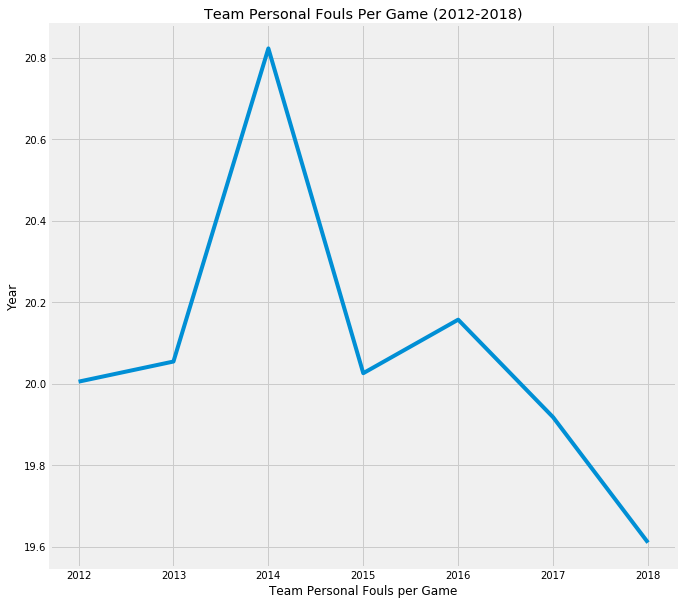

In [24]:
grouped_team_box_scores = team_box_scores.groupby("year").sum()['teamPF']
counted_team_box_scores = team_box_scores.groupby("year").count()['gmDate']
overall_pf_p_game = pd.DataFrame(grouped_team_box_scores / counted_team_box_scores)
overall_pf_p_game = overall_pf_p_game.reset_index().rename({0: "teamPF"}, axis=1)
plt.figure(figsize=(10,10))
sns.lineplot(x="year", y="teamPF", data=overall_pf_p_game)
plt.title("Team Personal Fouls Per Game (2012-2018)")
plt.xlabel("Team Personal Fouls per Game")
plt.ylabel("Year")

It seems that from 2014 onwards, team personal fouls per game have actually been trending downwards. This could signify more lenient reffing or less aggressive, physical play. Since there are only 6 years pictured here, this could also simply be some normal, expected volatility in the long run.

# Prediction # 

We are going to predict and experiment with two techniques: the Decision Tree and LogisticRegression.
First, we want to see if we can predict the outcome of a game.

In [25]:
def rmse(y, yhat):
    return np.sqrt(np.mean((y - yhat)**2))

We want to see if we can predict how a game will go based on the refs assigned to the game. We first experiment with accuracy of training a decision tree on just the ref and the team playing.

In [26]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import tree

decision_tree_model = tree.DecisionTreeClassifier()
train_cols = [x for x in train_with_dummies.columns if x.startswith("off_") or x.startswith("teamAbbr_")]
decision_tree_model = decision_tree_model.fit(train_with_dummies[train_cols], train_with_dummies['teamRslt'])
Y_pred = decision_tree_model.predict(train_with_dummies[train_cols])
Y_actual = train_with_dummies['teamRslt']
dt_refteam_score = decision_tree_model.score(train_with_dummies[train_cols], train_with_dummies['teamRslt'])
dt_refteam_err = rmse(Y_actual,Y_pred)
print("Training Accuracy (Ref and Team):", dt_refteam_score)
print("Training Error (Ref and Team):", dt_refteam_err)

Training Accuracy (Ref and Team): 0.6377372397272895
Training Error (Ref and Team): 0.6018826798244908


In [27]:
# If we train with the opponent team included, will our accuracy increase?
decision_tree_with_oppt = tree.DecisionTreeClassifier()
train_cols_oppt = [x for x in train_with_dummies.columns if x.startswith("off_") or x.startswith("teamAbbr_") or x.startswith("opptAbbr_")]
decision_tree_with_oppt = decision_tree_with_oppt.fit(train_with_dummies[train_cols_oppt], train_with_dummies['teamRslt'])
Y_pred = decision_tree_with_oppt.predict(train_with_dummies[train_cols_oppt])
dt_refteamopp_score = decision_tree_with_oppt.score(train_with_dummies[train_cols_oppt], train_with_dummies['teamRslt'])
dt_refteamopp_err = rmse(Y_actual, Y_pred)
print("Training Accuracy (Refs, Team, Oppt Team):", dt_refteamopp_score)
print("Training Error (Refs, Team, Oppt Team):", dt_refteamopp_err)

Training Accuracy (Refs, Team, Oppt Team): 0.900313248571955
Training Error (Refs, Team, Oppt Team): 0.3157320880557517


In [28]:
# Are the refs making a real difference here? Or is it just the team opposition?
decision_tree_oppt_with_norefs = tree.DecisionTreeClassifier()
train_cols_oppt_noref = [x for x in train_with_dummies.columns if x.startswith("teamAbbr_") or x.startswith("opptAbbr_")]
decision_tree_oppt_with_norefs = decision_tree_oppt_with_norefs.fit(train_with_dummies[train_cols_oppt], train_with_dummies['teamRslt'])
Y_pred = decision_tree_oppt_with_norefs.predict(train_with_dummies[train_cols_oppt])
dt_teamopp_score = decision_tree_oppt_with_norefs.score(train_with_dummies[train_cols_oppt], train_with_dummies['teamRslt'])
dt_teamopp_err = rmse(Y_actual, Y_pred)
print("Training Accuracy (Team and Oppt Team):", dt_teamopp_score)
print("Training Error (Team and Oppt Team):", dt_teamopp_err)

Training Accuracy (Team and Oppt Team): 0.900313248571955
Training Error (Team and Oppt Team): 0.3157320880557517


Training accuracy goes up a lot with the addition of the opposing team. Taking out the ref from training doesn't seem to change much. It seems like refs aren't an useful feature for predicting game outcome.

In [29]:
from sklearn.model_selection import KFold
from sklearn.base import clone

def cross_validate_rmse(model, cols):
    model = clone(model)
    five_fold = KFold(n_splits=5)
    rmse_values = []
    tr = train_with_dummies
    for tr_ind, va_ind in five_fold.split(tr):
        model.fit(tr.iloc[tr_ind,:][cols], tr['teamRslt'].iloc[tr_ind])
        rmse_values.append(rmse(tr['teamRslt'].iloc[va_ind], model.predict(tr[cols].iloc[va_ind,:])))
    return np.mean(rmse_values)

In [30]:
# Cross Validation Error Comparisons for 
print("Just Refs and Team:", cross_validate_rmse(decision_tree_model, train_cols))
print("Refs, Team, and Opposing Team:", cross_validate_rmse(decision_tree_with_oppt, train_cols_oppt))
print("Just Team and Opposing Team:", cross_validate_rmse(decision_tree_oppt_with_norefs, train_cols_oppt_noref))

Just Refs and Team: 0.6670700608874192
Refs, Team, and Opposing Team: 0.6681767849762995
Just Team and Opposing Team: 0.635452363265087


Text(0, 0.5, 'Type of Error')

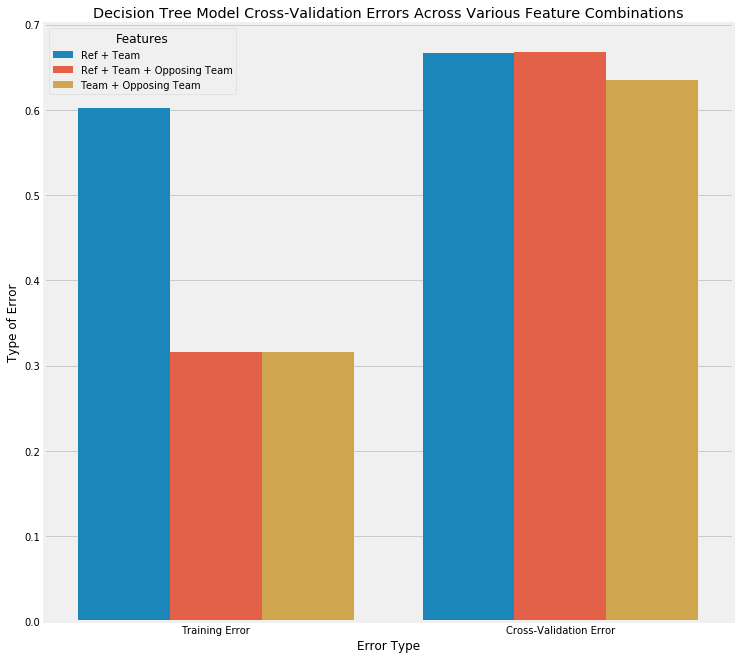

In [31]:
# Bar Graph of Decision Tree Model Cross-Validation Error Comparisons
final_data = [
    ["Training Error", "Ref + Team", dt_refteam_err],
    ["Training Error", "Ref + Team + Opposing Team", dt_refteamopp_err],
    ["Training Error", "Team + Opposing Team",dt_teamopp_err],
    ["Cross-Validation Error", "Ref + Team", cross_validate_rmse(decision_tree_model, train_cols)],
    ["Cross-Validation Error","Ref + Team + Opposing Team", cross_validate_rmse(decision_tree_with_oppt, train_cols_oppt)],
    ["Cross-Validation Error","Team + Opposing Team", cross_validate_rmse(decision_tree_oppt_with_norefs, train_cols_oppt_noref)]
]
features = ["Ref + Team", "Ref + Team + Opposing Team", "Team + Opposing Team"]
training_accuracy_bar_data = pd.DataFrame(columns=["Classifier","Features", "Accuracy"], data=np.array(final_data))
training_accuracy_bar_data
plt.figure(figsize=(11,11))
sns.barplot(data=training_accuracy_bar_data, x="Classifier", y="Accuracy", hue="Features")
plt.title("Decision Tree Model Cross-Validation Errors Across Various Feature Combinations")
plt.xlabel("Error Type")
plt.ylabel("Type of Error")

It looks like CV error stays somewhat consistent. However, it seems like using refs assigned to a game to predict the game outcome doesn't change much. Removing the referee as a feature actually seems to benefit by reducing cross-validation error. Adding the opposing team as a feature reduces training error, while the ref's name as a feature seems to produce no real change on the model error.

We have experimented with the Decision Tree Classifier to make predictions. Now, we will try using Logistic Regression instead.

In [32]:
decision_tree_model = LogisticRegressionCV()
train_cols = [x for x in train_with_dummies.columns if x.startswith("off_") or x.startswith("teamAbbr_")]
decision_tree_model = decision_tree_model.fit(train_with_dummies[train_cols], train_with_dummies['teamRslt'])
Y_pred = decision_tree_model.predict(train_with_dummies[train_cols])
Y_actual = train_with_dummies['teamRslt']
lr_refteam_score = decision_tree_model.score(train_with_dummies[train_cols], train_with_dummies['teamRslt'])
lr_refteam_err = rmse(Y_actual,Y_pred)
print("Training Accuracy (Ref and Team):", lr_refteam_score)
print("Training Error (Ref and Team):", rmse(Y_actual,Y_pred))

Training Accuracy (Ref and Team): 0.6013758368650575
Training Error (Ref and Team): 0.6313669005696629


In [33]:
# If we train with the opponent team included, will our accuracy increase? - Logistic Regressions
decision_tree_with_oppt = LogisticRegressionCV()
train_cols_oppt = [x for x in train_with_dummies.columns if x.startswith("off_") or x.startswith("teamAbbr_") or x.startswith("opptAbbr_")]
decision_tree_with_oppt = decision_tree_with_oppt.fit(train_with_dummies[train_cols_oppt], train_with_dummies['teamRslt'])
Y_pred = decision_tree_with_oppt.predict(train_with_dummies[train_cols_oppt])
lr_refteamopp_score = decision_tree_with_oppt.score(train_with_dummies[train_cols_oppt], train_with_dummies['teamRslt'])
lr_refteamopp_err = rmse(Y_actual, Y_pred)
print("Training Accuracy (Refs, Team, Oppt Team):", lr_refteamopp_score)
print("Training Error (Refs, Team, Oppt Team):", lr_refteamopp_err)

Training Accuracy (Refs, Team, Oppt Team): 0.6424666789509244
Training Error (Refs, Team, Oppt Team): 0.5979409009668728


In [34]:
decision_tree_oppt_with_norefs = LogisticRegressionCV()
train_cols_oppt_noref = [x for x in train_with_dummies.columns if x.startswith("teamAbbr_") or x.startswith("opptAbbr_")]
decision_tree_oppt_with_norefs = decision_tree_oppt_with_norefs.fit(train_with_dummies[train_cols_oppt], train_with_dummies['teamRslt'])
Y_pred = decision_tree_oppt_with_norefs.predict(train_with_dummies[train_cols_oppt])
lr_teamopp_score = decision_tree_oppt_with_norefs.score(train_with_dummies[train_cols_oppt], train_with_dummies['teamRslt'])
lr_teamopp_err = rmse(Y_actual, Y_pred)
print("Training Accuracy (Team and Oppt Team):", lr_teamopp_score)
print("Training Error (Team and Oppt Team):", lr_teamopp_err)

Training Accuracy (Team and Oppt Team): 0.6424666789509244
Training Error (Team and Oppt Team): 0.5979409009668728


In [35]:
# CV Error Comparisons
print("Just Refs and Team:", np.mean(decision_tree_model.scores_[1]))
print("Refs, Team, and Opposing Team:", np.mean(decision_tree_with_oppt.scores_[1]))
print("Just Team and Opposing Team:", np.mean(decision_tree_oppt_with_norefs.scores_[1]))

Just Refs and Team: 0.584255500999513
Refs, Team, and Opposing Team: 0.6175344208577742
Just Team and Opposing Team: 0.6175344208577742


Text(0, 0.5, 'Type of Error')

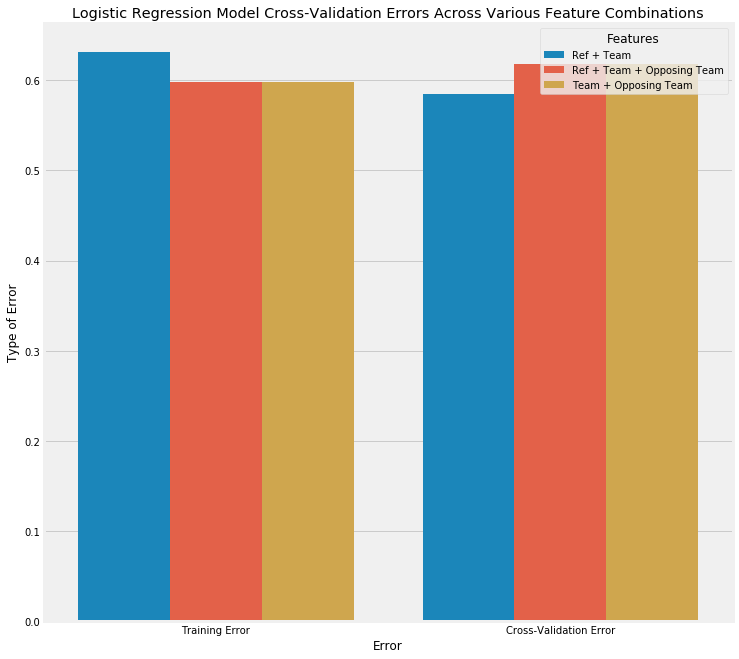

In [36]:
# Bar Graph of Logistic Regression Model Cross-Validation Error Comparisons
final_data = [
    ["Training Error", "Ref + Team", lr_refteam_err],
    ["Training Error", "Ref + Team + Opposing Team", lr_refteamopp_err],
    ["Training Error", "Team + Opposing Team", lr_teamopp_err],
    ["Cross-Validation Error", "Ref + Team", np.mean(decision_tree_model.scores_[1])],
    ["Cross-Validation Error","Ref + Team + Opposing Team", np.mean(decision_tree_with_oppt.scores_[1])],
    ["Cross-Validation Error","Team + Opposing Team", np.mean(decision_tree_oppt_with_norefs.scores_[1])]
]
features = ["Ref + Team", "Ref + Team + Opposing Team", "Team + Opposing Team"]
training_accuracy_bar_data = pd.DataFrame(columns=["Classifier","Features", "Accuracy"], data=np.array(final_data))
training_accuracy_bar_data
plt.figure(figsize=(11,11))
sns.barplot(data=training_accuracy_bar_data, x="Classifier", y="Accuracy", hue="Features")
plt.title("Logistic Regression Model Cross-Validation Errors Across Various Feature Combinations")
plt.xlabel("Error")
plt.ylabel("Type of Error")

As we can see, cross-validation shows that we are not overfitting from adding the opposing team as a feature, due to the decrease in training error and increase in cross-validation error being small.

Text(0.5, 1.0, 'Training Accuracies of Two Classifiers Across Various Feature Combinations')

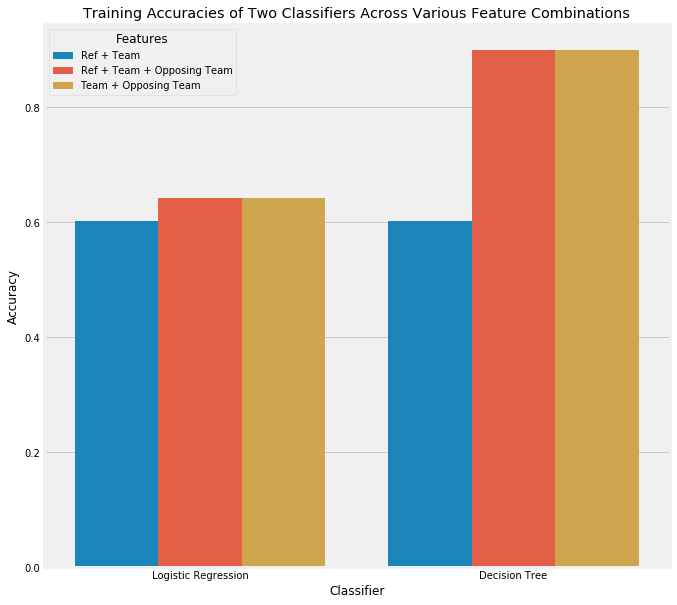

In [37]:
# Bar Graph of Training Accuracy
final_data = [
    ["Logistic Regression", "Ref + Team", lr_refteam_score],
    ["Logistic Regression", "Ref + Team + Opposing Team", lr_refteamopp_score],
    ["Logistic Regression", "Team + Opposing Team", lr_teamopp_score],
    ["Decision Tree", "Ref + Team", lr_refteam_score],
    ["Decision Tree","Ref + Team + Opposing Team", dt_refteamopp_score],
    ["Decision Tree","Team + Opposing Team", dt_teamopp_score]
]
features = ["Ref + Team", "Ref + Team + Opposing Team", "Team + Opposing Team"]
training_accuracy_bar_data = pd.DataFrame(columns=["Classifier","Features", "Accuracy"], data=np.array(final_data))
training_accuracy_bar_data
plt.figure(figsize=(10,10))
sns.barplot(data=training_accuracy_bar_data, x="Classifier", y="Accuracy", hue="Features")
plt.title("Training Accuracies of Two Classifiers Across Various Feature Combinations")

We get a similar result using Logistic Regression and a Decision Tree. Refs don't help much in predicting the outcome of a game and don't serve as an useful feature in this case. Training accuracy goes up when adding the opposing team while cross-validation error doesn't change much. As a result, we have found that the ref doesn't have that much impact in predicting the outcome of a game. They seem to be a neutral addition to the model and therefore are not an useful feature in outcome prediction. While this doesn't necessarily translate to the ref's impact being completely negligible on the outcome of a NBA game, other features and factors seem to be weighted a lot more, as it should. A ref not having an impact on the game's outcome is a great thing for NBA players and viewers alike.